In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

advertising = pd.read_csv('Advertising.csv')
advertising.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [2]:
advertising['TV_std'] = (advertising['TV'] - advertising['TV'].mean()) / advertising['TV'].std()
advertising['TV_norm'] = (advertising['TV'] - advertising['TV'].min()) / (advertising['TV'].max()- advertising['TV'].min())
advertising

,Unnamed: 0,TV,radio,newspaper,sales,TV_std,TV_norm
0,1,230.1,37.8,69.2,22.1,0.967425,0.775786
1,2,44.5,39.3,45.1,10.4,-1.194379,0.148123
2,3,17.2,45.9,69.3,9.3,-1.512360,0.055800
3,4,151.5,41.3,58.5,18.5,0.051919,0.509976
4,5,180.8,10.8,58.4,12.9,0.393196,0.609063
...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,-1.267759,0.126818
196,197,94.2,4.9,8.1,9.7,-0.615491,0.316199
197,198,177.0,9.3,6.4,12.8,0.348934,0.596212
198,199,283.6,42.0,66.2,25.5,1.590574,0.956713


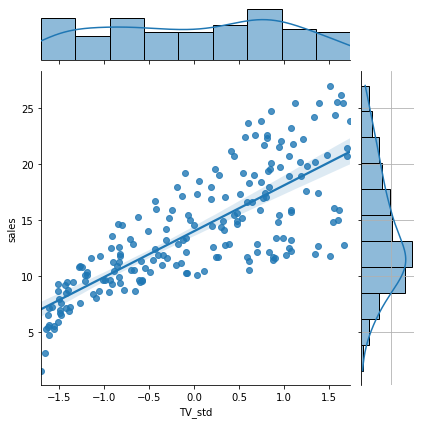

In [3]:
sns.jointplot(data=advertising, x='TV_std', y='sales', kind='reg')
plt.grid()

In [4]:
import numpy as np

def mse(response, pred):
    sum = 0
    n = len(pred)
    for i in range(n):
        sum += (response[i] - pred[i])**2
    error = sum / n
    return error

def mae(response, pred):
    sum = 0
    n = len(pred)
    for i in range(n):
        sum += abs(response[i] - pred[i])
    error = sum / n
    return error
# Find every single combination of b0 and b1 and apply b0 + b1*x to the data
def y_pred(b0, b1,arr, func):
    y_pred = []
    for j in b0:
        tmp = []
        for k in b1:
            pred = []
            for i in arr:
                pred.append(j+ k*i) 
            tmp.append(func(advertising['sales'], pred))
        y_pred.append(tmp) 

    return np.array(y_pred)


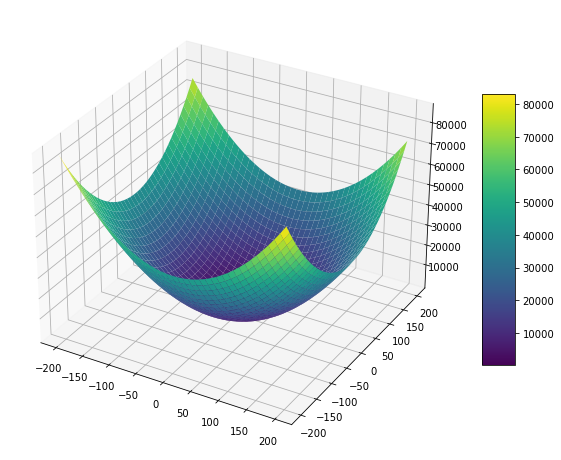

In [5]:

b0 = np.arange(-200,201,5)
b1 = np.arange(-200,201,5)

b0_grid, b1_grid = np.meshgrid(b0, b1)

y_pred_mse = y_pred(b0, b1, advertising['TV_std'], mse)

# MSE Std
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') 
surf = ax.plot_surface(b0_grid,b1_grid,y_pred_mse, cmap = plt.cm.viridis) 
fig.colorbar(surf, shrink=.5, aspect=8)

plt.show()


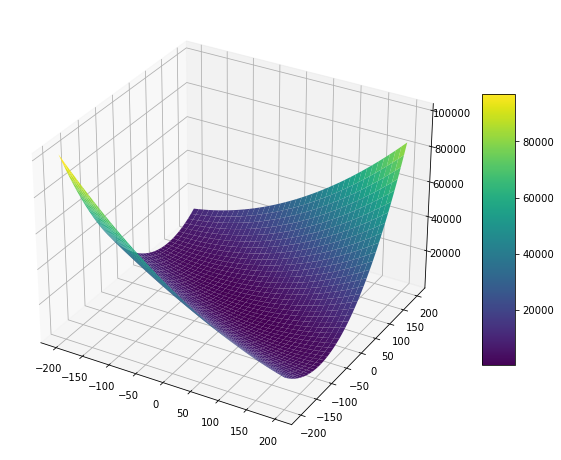

In [6]:
# MSE Norm
y_pred_mse_norm = y_pred(b0, b1, advertising['TV_norm'], mse)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') 
surf = ax.plot_surface(b0_grid,b1_grid,y_pred_mse_norm, cmap = plt.cm.viridis) 
fig.colorbar(surf, shrink=.5, aspect=8)
plt.show()

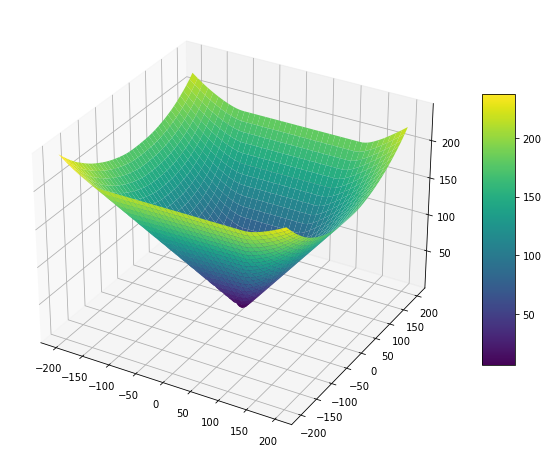

In [7]:
# MAE Std
y_pred_mae = y_pred(b0, b1, advertising['TV_std'], mae)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') 
surf = ax.plot_surface(b0_grid,b1_grid,y_pred_mae, cmap = plt.cm.viridis) 
fig.colorbar(surf, shrink=.5, aspect=8)
plt.show()


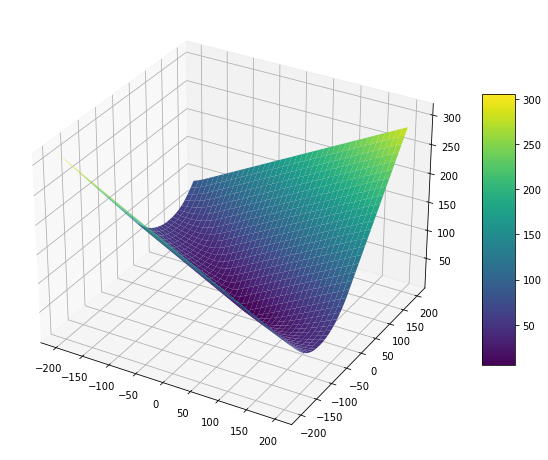

In [8]:
# MAE Norm
y_pred_mae_norm = y_pred(b0, b1, advertising['TV_norm'], mae)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') 
surf = ax.plot_surface(b0_grid,b1_grid,y_pred_mae_norm, cmap = plt.cm.viridis) 
fig.colorbar(surf, shrink=.5, aspect=8)
plt.show()

In [18]:
b0_arr_step = []
b1_arr_step = []
def random_step_search(X, y, k=1000):
    b0 = np.random.uniform(-200, 200)
    b1 = np.random.uniform(-200, 200)
    mse = ((y - (b0 + b1*X))**2).mean()
    
    for i in range(k):
        new_b0 = b0 + np.random.uniform(-1, 1)
        new_b1 = b1 + np.random.uniform(-1, 1)
        new_mse = ((y - (new_b0 + new_b1*X))**2).mean()
        b0_arr_step.append(new_b0)
        b1_arr_step.append(new_b1)
        
        if new_mse < mse:
            b0, b1, mse = new_b0, new_b1, new_mse
    
    return b0, b1
b0, b1 = random_step_search(advertising['TV_std'], advertising['sales'])
print("b0:", b0)
print("b1:", b1)

b0: 13.989884426401595
b1: 4.130206164116717


In [19]:
b0_arr_descent = []
b1_arr_descent = []
def gradient_descent(X, y, learning_rate=0.01, k=1000):
    b0 = np.random.uniform(-200, 200)
    b1 = np.random.uniform(-200, 200)
    
    for i in range(k):
        y_pred = b0 + b1*X
        b0 = b0 - learning_rate * ((-2 / len(X)) * sum(y - y_pred))
        b1 = b1 - learning_rate * ((-2 / len(X)) * sum(X * (y - y_pred)))
        b0_arr_descent.append(b0)t
        b1_arr_descent.append(b1)

    return b0,b1
 
b0, b1 = gradient_descent(advertising['TV_std'], advertising['sales'])
print("b0:", b0)
print("b1:", b1)

b0: 14.022499984405295
b1: 4.081221636308854


In [20]:
# Using scikit learn for linear regression
from sklearn import linear_model as lm

X = advertising['TV_std'].values.reshape(-1, 1)
y = advertising['sales'].values.reshape(-1, 1)

regr = lm.LinearRegression()
regr.fit(X, y)
y_intercept = regr.intercept_
coef = regr.coef_
print("Slope: ", coef)
print("Y-Intercept: ", y_intercept)



Slope:  [[4.08122196]]
Y-Intercept:  [14.0225]


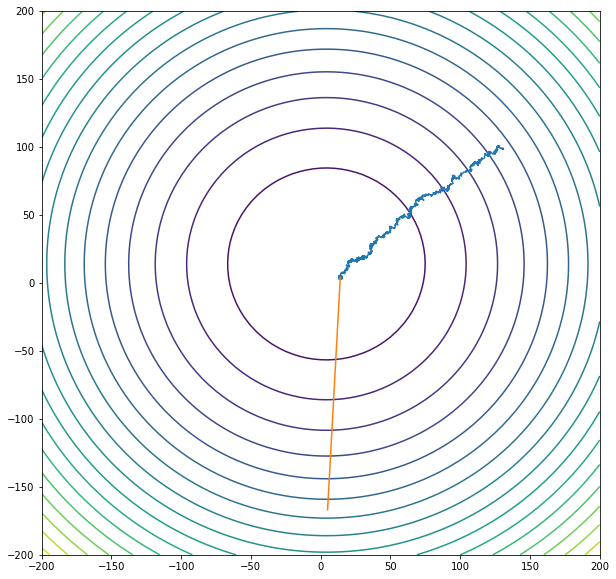

In [22]:
#Plot the progress of your two algorithms on a single contour plot of the MSE error function.
plt.figure(figsize=(10,10)) 
cp = plt.contour(b0_grid,b1_grid,y_pred_mse, 20) 
plt.plot(b0_arr_step,b1_arr_step)
plt.plot(b0_arr_descent,b1_arr_descent)
plt.show()
